# DSGE Linearization Problem Set

## Problem 1

In [115]:
import sympy as sy
import numpy as np
from scipy.optimize import fsolve
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from collections import namedtuple

F = 3.13
G = -9.25
H = 3.2
L = 0.31
M = -0.12
P_1 = 2.55
P_2 = 0.4
Q1 = -0.1
Q2 = 0.03
K_bar = 0.21


Text(0.5, 0, 'K/prime')

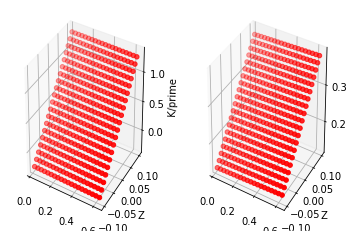

In [116]:
beta= .98
alpha= .4
sigma = .02
rho = .95

A = alpha*beta
K = A**(1/(1-alpha))

F = (alpha*K**(alpha-1)) / (K**alpha -K)
G = - (alpha*K**(alpha-1)*(alpha+K**(alpha-1)))/ (K**alpha - K)
H = (alpha**2 *K**(2*(alpha-1)))/(K**alpha - K)
L = -(alpha*K*(2*(alpha-1)))/(K**alpha - K)
M = (alpha**2*K*(2*(alpha-1)))/(K**alpha - K)
N = rho

P1 = (-G + np.sqrt(G**2-4*F*H))/(2*F)
P2 = (-G - np.sqrt(G**2-4*F*H))/(2*F)
Q1 = (-(L*N+M)/(F*N+F*P1+G))
Q2 = (-(L*N+M)/(F*N+F*P2+G))

varbles = (F,G,H,L,M,P1,P2,Q1,Q2,K)
varbles_name = ["F","G","H","L","M","P_1","P_2","Q1","Q2","K_bar"]

for i,(var, nam) in enumerate(zip(varbles, varbles_name)):
    print(nam,'=',round(var,2))

K_grid = np.linspace(.1*K,3*K,20)
Z_grid = np.linspace(-.1,.1,20)
K_prim = np.zeros([20,20])
K_prim1 = np.zeros([20,20])
K_prim2 = np.zeros([20,20])

K_bar = K
for iK, K in enumerate(K_grid):
    for jZ, Z in enumerate(Z_grid):
    # policy         
        K_prim1[iK,jZ] =K_bar + P1*(K - K_bar)+Q1*Z   
        K_prim2[iK,jZ] =K_bar + P2*(K - K_bar)+Q2*Z

#Plot    
Kax, Zax = np.meshgrid(K_grid,Z_grid)
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Kax, Zax, K_prim1, c='r',marker='o')
ax.set_xlabel('K')
ax.set_ylabel('Z')
ax.set_zlabel('K/prime')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(Kax, Zax, K_prim2, c='r',marker='o')
ax.set_xlabel('K')
ax.set_ylabel('Z')
ax.set_zlabel('K/prime')


## Exercise 2: log case

In [117]:
K_t1, K_t2, K_t, Z_t1, Z_t, beta, alpha, x = sy.symbols('K_t1 K_t2 K_t \
Z_t1 Z_t beta alpha x')

Oiler_log_lin = sy.log(beta) + sy.log(alpha*sy.exp(Z_t1)*K_t1**(alpha-1))+ \
sy.log(sy.exp(Z_t)*K_t**(alpha)- K_t1) - sy.log(sy.exp(Z_t1)*K_t1**(alpha)-K_t2)

F = sy.diff(Oiler_log_lin,K_t2)
G = sy.diff(Oiler_log_lin,K_t1)
H = sy.diff(Oiler_log_lin,K_t)
L = sy.diff(Oiler_log_lin,Z_t1)
M = sy.diff(Oiler_log_lin,Z_t)
N = 1

beta_= .98
alpha_ = .35
A = alpha_*beta_
K_bar = A**(1/(1-alpha_))

F = F.subs({K_t2:K_bar, K_t1:K_bar,K_t:K_bar, Z_t1: 0,Z_t: 0, alpha:alpha_, beta: beta_})
G = G.subs({K_t2:K_bar, K_t1:K_bar,K_t:K_bar, Z_t1: 0,Z_t: 0, alpha:alpha_, beta: beta_})
H = H.subs({K_t2:K_bar, K_t1:K_bar,K_t:K_bar, Z_t1: 0,Z_t: 0, alpha:alpha_, beta: beta_})
L = L.subs({K_t2:K_bar, K_t1:K_bar,K_t:K_bar, Z_t1: 0,Z_t: 0, alpha:alpha_, beta: beta_})
M = M.subs({K_t2:K_bar, K_t1:K_bar,K_t:K_bar, Z_t1: 0,Z_t: 0, alpha:alpha_, beta: beta_})

P1 = (-G + sy.sqrt(G**2-4*F*H))/(2*F)
P2 = (-G - sy.sqrt(G**2-4*F*H))/(2*F)
Q1 = (-(L*N+M)/(F*N+F*P1+G))
Q2 = (-(L*N+M)/(F*N+F*P2+G))

varbles = (F,G,H,L,M,P1,P2,Q1,Q2,K_bar)
varbles_name = ["F","G","H","L","M","P_1","P_2","Q1","Q2","K_bar"]

for i,(var, nam) in enumerate(zip(varbles, varbles_name)):
    print(nam,'=',round(var,2))

    

F = 2.71
G = -8.84
H = 2.76
L = -0.52
M = 1.52
P_1 = 2.92
P_2 = 0.35
Q1 = -0.57
Q2 = 0.19
K_bar = 0.19


Text(0.5, 0, 'K/prime')

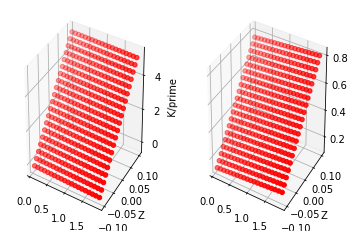

In [118]:
K_grid = np.linspace(.1*K,3*K,20)
Z_grid = np.linspace(-.1,.1,20)
K_prim = np.zeros([20,20])
K_prim1 = np.zeros([20,20])
K_prim2 = np.zeros([20,20])

for iK, K in enumerate(K_grid):
    for jZ, Z in enumerate(Z_grid):
    # policy         
        K_prim1[iK,jZ] =K_bar + P1*(K - K_bar)+Q1*Z   
        K_prim2[iK,jZ] =K_bar + P2*(K - K_bar)+Q2*Z

#Plot    
Kax, Zax = np.meshgrid(K_grid,Z_grid)
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Kax, Zax, K_prim1, c='r',marker='o')
ax.set_xlabel('K')
ax.set_ylabel('Z')
ax.set_zlabel('K/prime')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(Kax, Zax, K_prim2, c='r',marker='o')
ax.set_xlabel('K')
ax.set_ylabel('Z')
ax.set_zlabel('K/prime')


# Problem 3

We have the first-order Taylor-series approximation of the characteristic equations as

$$
E_t \left( F \tilde{X}_{t+1} + G \tilde{X}_t + H \tilde{X}_{t-1} + L \tilde{Z}_{t+1} + M\tilde{Z}_t\right) = 0
$$

We substitute in the two equations 

+ With the state dynamic equation defined as the VAR-like process

$$
\tilde{Z}_t = N \tilde{Z}_{t-1}+ \epsilon_t
$$

with $E_t{\epsilon}_{t+1} = 0$

+ The approximate (log-)linearized transition function defined as
$$
\tilde{X}_t = P \tilde{X}_{t-1}+Q\tilde{Z}_t
$$


Substituting the two in we get desired result

$$
\left( (FP + G)P + H\right)\tilde{X}_{t-1}+ \left[ (FQ+L)N +(FP+G)Q+M \right]\tilde{Z}_t = 0
$$


# Problem 4

In [45]:
# parameters
params_list = ["gamma", "ksi", "beta", "alpha", "a", "delta", \
          "z_bar", "rho_z", "tau"]
varbles_list = ['k','c', 'l', 'w', 'r', 'T','z']
[gamma, xi, beta, alpha, a, delta, z_bar, rho_z, tau] = [2.50, 1.50, 0.98, .4, .5, .10, \
                   0 , .9, .05]
params = [gamma, xi, beta, alpha, a, delta, z_bar, rho_z, tau] 

def u_c(c,l):
    return np.sign(c)*np.abs(c)**(-gamma)

def u_l(c,l):
    return -a*np.sign(1-l)*np.abs(1-l)**(-xi)
def f_k(k,l,z):
    return alpha*np.sign((k/l))*np.abs(k/l)**(alpha-1)*np.exp(z*(1-alpha))
def f_l(k,l,z):
    return (1-alpha)*np.sign((k/l))*np.abs(k/l)**alpha*np.exp(z*(1-alpha))

In [46]:
def steady_st_bsline(arg_fns, args,params):
    k,c, l, w, r, T,z  = args
    u_c, u_l, f_k,f_z = arg_fns
    gamma, ksi, beta, alpha, a, delta, z_bar, rho_z, tau = params
    f1 = c - (1-tau)*(w*l + (r-delta)*k) - T 
    f2 = u_c(c,l) - beta*(u_c(c,l)*((r-delta)*(1-tau)+1 )) 
    f3 = -u_l(c,l) - u_c(c,l)*w*(1-tau) 
    f4 = r -f_k(k,l,z)
    f5 = w - f_l(k,l,z)
    f6 = T - tau*(w*l + (r-delta)*k)
    f7 = z - z_bar

    return (f1,f2,f3,f4,f5,f6,f7)

In [47]:
varbles_0 = (3, .5,.5, .5, .5, .5, .5) 

f = lambda varbles: steady_st_bsline((u_c,u_l, f_k, f_l), varbles, params) 
(k,c, l, w, r, T,z) = fsolve(f, varbles_0)

# Output and investment
F_bar = k**alpha*l**(1-alpha)
inv = delta*k 

print('---------------- k =',round(k,2),'---------------------------' )
print('---------------- l =',round(c,2),'---------------------------' )
print('---------------- c =',round(l,2),'---------------------------' )
print('---------------- w =',round(w,2),'---------------------------' )
print('---------------- r =',round(r,2),'---------------------------' )
print('---------------- T =',round(T,2),'---------------------------' )
print('---------------- z =',round(z,2),'---------------------------' )
print('---------------- output =',round(F_bar,2),'------------------' )
print('---------------- investment =',round(inv,2),'----------------' )


---------------- k = 4.23 ---------------------------
---------------- l = 0.86 ---------------------------
---------------- c = 0.58 ---------------------------
---------------- w = 1.33 ---------------------------
---------------- r = 0.12 ---------------------------
---------------- T = 0.04 ---------------------------
---------------- z = 0.0 ---------------------------
---------------- output = 1.28 ------------------
---------------- investment = 0.42 ----------------


## Exercise 5

In [33]:
h = 0.01

f = lambda varbles: steady_st_bsline((u_c,u_l, f_k, f_l), varbles, params) 
f_val = fsolve(f, varbles_0)

df = []
for i, param_i  in enumerate(params):
    params_new = params.copy()
    params_new[i] = params[i]+h
    f = lambda args: steady_st_bsline((u_c,u_l, f_k, f_l), args, params_new) 
    f_h =  fsolve(f,varbles_0)
    df.append((f_val - f_h)/h)

# param_list = {'alpha', 'beta', 'gamma', 'delta', 'xi', 'tau', 'a', 'z' } -> params
table = pd.DataFrame( index = params_list,data=df)
table.columns = varbles_list
print('--------------------------- Numerical Derivatives --------------------')
print(table)

kbar = k
ellbar =l

--------------------------- Numerical Derivatives --------------------
               k         c         l         w             r         T  \
gamma   0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
ksi     0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
beta  -74.513498 -1.697165 -0.377952 -8.546014  1.084963e+00 -0.084858   
alpha   0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
a       0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
delta  44.155602  3.319238 -1.257752  6.821611 -1.000000e+00  0.165962   
z_bar  -2.845374 -0.579619  0.190341 -1.334615 -1.061373e-10 -0.028981   
rho_z   0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
tau     2.336004  0.235789  0.139655  0.166284 -2.285349e-02 -0.846556   

                  z  
gamma  0.000000e+00  
ksi    0.000000e+00  
beta  -1.238495e-18  
alpha  0.000000e+00  
a      0.000000e+00  
delta  3.688082e-30  
z_bar -1.000000e+00  
rho_z  0.000

## Exercise 6

Household budget constraint
$ c_t = (1-\tau)\left(w_t\ell_t+(1+ r_t-\delta)k_t \right) + k_t + T_t - k_{t+1} $ (1)

Intertemporal Euler equation
$ u_c(c_t,\ell_t) = \beta E_t\left\{ u_c(c_{t+1},\ell_{t+1})\left( 1 + (r_{t+1}-\delta)(1-\tau) \right) \right\} $ (2)

Labor-leisure Euler equation
$ -u_{\ell}(c_t,\ell_t) = u_{c}(c_t,\ell_t)w_t $ (3)

Results from Firm's problem
$ r_t = f_K(k_t,\ell_t,z_t) $ (4)
$ w_t = f_L(k_t,\ell_t,z_t) $ (5)

Law of motion for technology
$ z_t = \rho_z z_{t-1}+ \epsilon^z_t ;\quad \epsilon^z_t\sim\text{i.i.d.}(0,\sigma_z^2) $ (6)

Government's Budget Constraint
$\tau \left[ w_tl_t + (r_t - \delta) k_t\right]  $ (7)

Utility function
$ u_t = \frac{c_t^{1-\gamma}-1}{1-\gamma} + a \frac{(1- \ell)^{1-\xi}-1}{1-\xi} $ (7)

Production function
$ Y_t = k_t^\alpha (e^{z_t} \ell_t )^{1-\alpha} $ (8)

with the following parameter values:

$\alpha = .4, \beta = .98, \gamma = 2.5, \delta = .1, \xi = 1.5, \rho_z = .9, \sigma = .01, a=.5, \text{ and } \tau = .05$.

The variables are categorized as:

$ X_t = \left\{k_{t-1}\right\} $, defined by equation (2).

$ Y_t = \left\{\ell_t,\right\} $, defined by equation (3).

$ Z_t = \left\{z_t\right\} $, defined by equation (6).

$ D_t = \left\{c_t,w_t,r_t,u_t,Y_t\right\} $, defined by equations (1), (4), (5), (7) and (8).



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# import the modules from LinApp
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

In [119]:
def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Outputs are:
        GDP: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        i: investment
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    ell = Y
    z = Z
    
    # truncate labor if necessary
    if ell > 0.9999:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definintion values
    GDP = k**alpha*(np.exp(z)*ell)**(1-alpha)
    w = (1-alpha)*GDP/ell
    r = alpha*GDP/k
    T = tau*(w*ell + (r - delta)*k)
    c = (1-tau)*(w*ell + (r - delta)*k) + k + T - kp
    i = GDP - c
    u = (c**(1-gamma)-1)/(1-gamma) + a*((1-ell)**(1-xi)-1)/(1-xi)

    return GDP, w, r, T, c, i, u


def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definitions for now and next period
    ell = Y
    if ell > 1:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    GDP, w, r, T, c, i, u = Modeldefs(Xp, X, Y, Z, params)
    GDPp, wp, rp, Tp, cp, ip, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    E1 = (c**(-gamma)*w*(1-tau)) / (a*(1-ell)**(-xi)) - 1
    E2 = (beta * c**(gamma)*((rp - delta)*(1-tau)+1)) / (cp**(gamma)) - 1
    
    return np.array([E1, E2])

In [120]:
# set parameter values
alpha = .40
beta = .98
gamma = 2.5
delta = .1
a = .5
xi = 1.5
rho = .9
sigma = .1
tau = 0.05

# make parameter list to pass to functions
params = np.array([alpha, beta, gamma, delta, a, xi, rho, sigma, tau])

# set LinApp parameters
Zbar = np.array([0.])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

We next define and setup a model parameters vector, along with other parameters needed by `LinApp_FindSS`.

Now we can use `fsolve` to find the steady state values.  `LinApp_FindSS` does this very quickly and easily for us.

In [121]:
# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check SS: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

# find the steady state values for the definitions

Ybar, wbar, rbar, Tbar, cbar, ibar, ubar = Modeldefs(kbar, kbar, ellbar, 0.0, params)

# display all steady state values
print ('kbar:   ', kbar)
print ('ellbar: ', ellbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('Tbar:   ', Tbar)
print ('cbar:   ', cbar)
print ('ibar:   ', ibar)
print ('ubar:   ', ubar)

check SS:  [-7.99360578e-15 -1.11022302e-16]
kbar:    4.225229026783882
ellbar:  0.5797914531670072
Ybar:    1.2832261088325905
wbar:    1.3279527683513068
rbar:    0.12148227712137477
Tbar:    0.04303516030771012
cbar:    0.8607032061542021
ibar:    0.4225229026783883
ubar:    -0.7108726381177671


We now use the `LinApp` toolkit to get the linear coefficients.

In [122]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
   LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, Zbar, Sylv)

print ('F: ', FF)
print ('G: ', GG)
print ('H: ', HH)
print ('L: ', LL)
print ('M: ', MM)
print ('N: ', NN)
print ('P: ', PP)
print ('Q: ', QQ)
print ('R: ', RR)
print ('S: ', SS)

F:  [[2.90460171]]
G:  [[-5.88766154]]
H:  [[2.96699916]]
L:  [[-2.16849645]]
M:  [[2.23635645]]
N:  0.9
P:  [[0.91529369]]
Q:  [[0.54504226]]
R:  [[-0.02633647]]
S:  [[-0.00655754]]


## Exercise 7

In [68]:
# set number of observations
nobs = 250 
sims = 1000
sigma = .0004

# create a history of z's using equation (7)
Yhist = np.zeros((sims,nobs))
whist = np.zeros((sims,nobs))
rhist = np.zeros((sims,nobs))
chist = np.zeros((sims,nobs))
ihist = np.zeros((sims,nobs))
uhist = np.zeros((sims,nobs))
zhist = np.zeros((nobs+1))
ellhist = np.zeros((nobs+1))
khist = np.zeros((nobs+1))
lhist = np.zeros((sims,nobs))

for iS in range(sims):
    zhist = np.zeros(nobs+1)
    epshist = sigma*np.random.normal(0., 1., nobs+1)
    #epshist = np.zeros(nobs+1)
    #epshist[9] = sigma
    #zhist[0] = epshist[0]
    for t in range(1,nobs+1):
        zhist[t] = rho*zhist[t-1] + epshist[t]

    # LinApp_SSL requires that Zhist be a 2-dimensional array
    Zhist = np.reshape(zhist, (nobs+1, 1))

    # Linapp_SSL also requires that starting values be arrays
    k0 = np.array([[kbar]])
    ell0 = np.array([[ellbar]])

    # create a history of k's and ell's using LinApp_SSL
    khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)
    lhist[iS,:] = np.reshape(ellhist[0:nobs],nobs)
    #plt.figure()
    #plt.plot(khist)
    #plt.show()
    #plt.figure()
    #plt.plot(ellhist)
    #plt.show()
    # create histories of remaining variables
    for t in range(0,nobs):
        Yhist[iS,t], whist[iS,t], rhist[iS,t], Thist, chist[iS,t], ihist[iS,t], uhist[iS,t] = \
            Modeldefs(khist[t+1], khist[t], ellhist[t], Zhist[t], params)



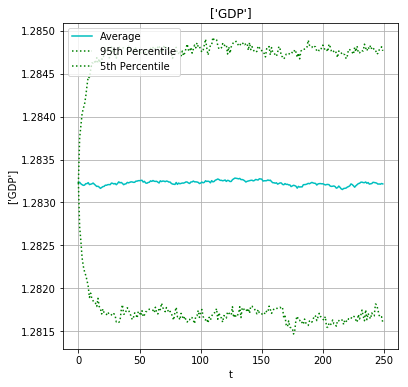

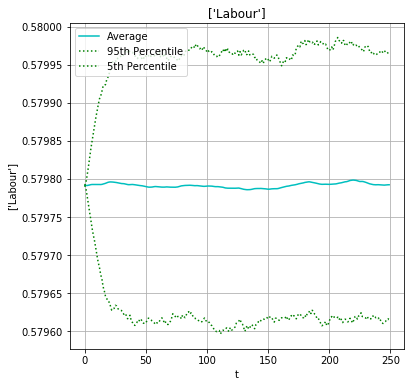

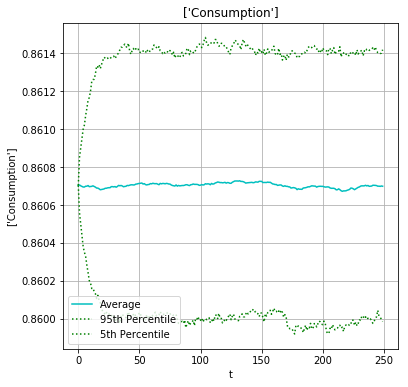

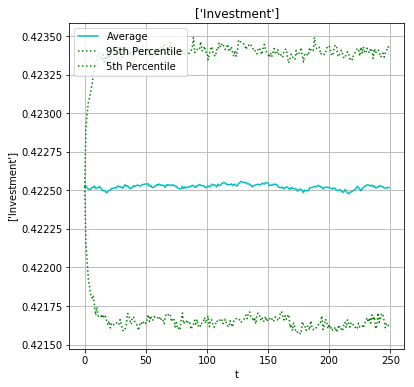

In [69]:
def plot_sim(hist,label):
    # plot time series
    [n,t] = np.shape(hist)
    time = range(0, t)
    
    hist_av = np.mean(hist,axis=0)
    hist_95 = np.percentile(hist,95,axis=0)
    hist_5 = np.percentile(hist,5,axis=0)
    
    fig = plt.figure(figsize=(6,6))
    plt.plot(time, hist_av,'c', label='Average')
    plt.plot(time, hist_95, 'g:', label='95th Percentile')
    plt.plot(time, hist_5, 'g:', label='5th Percentile')
    plt.xlabel('t')
    plt.ylabel(label)
    plt.title(label)
    plt.legend()
    plt.grid()
    plt.show()


plot_sim(Yhist,["GDP"])
plot_sim(lhist,['Labour'])
plot_sim(chist,['Consumption'])
plot_sim(ihist,['Investment'])



## Exercise 8

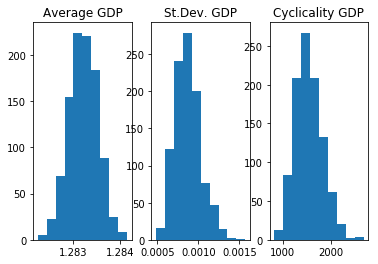

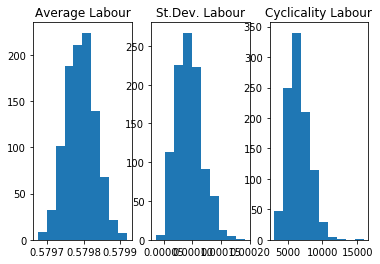

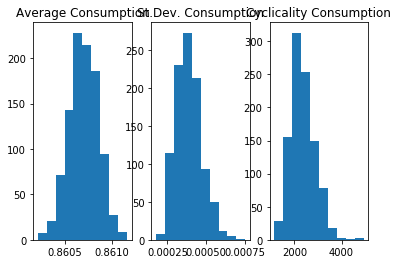

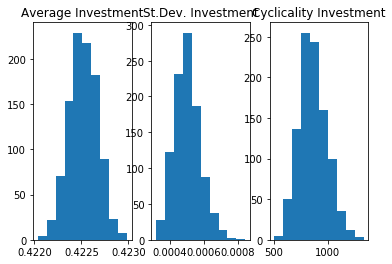

In [110]:
def hist_sim(hist,label):
    # plot time series
    [n,t] = np.shape(hist)
    time = range(0, t)
    
    av = np.mean(hist,axis=1)
    stdev = np.std(hist,axis=1)
    coef_var = av / stdev
    #pers = np.zeros(n)
    #cyc = np.zeros(n-1)
    
    #for iCol in range(n-1):
    #    pers[iCol] = np.corrcoef(hist[:,iCol+1:],hist[0:,:],1)
    #    cyc[iCol] = np.corrcoef(hist[:,iCol],Yhist[:,iCol],iCol)
    
        
    plt.figure()
    plt.subplot(131)
    plt.hist(av)
    plt.title('Average'+' '+ label)
    plt.subplot(132)    
    plt.hist(stdev)
    plt.title('St.Dev.'+' '+ label)
    plt.subplot(133)
    plt.hist(coef_var)
    #plt.title('Coef. Variation'+' '+ label)
    #plt.subplot(324)
    #plt.hist(pers ,label='Persistance')
    #plt.title('Persistance'+' '+ label)
    #plt.subplot(325)
    #plt.hist(cyc)
    
    plt.title('Cyclicality'+' '+ label)
    plt.show()


hist_sim(Yhist,("GDP"))
hist_sim(lhist,("Labour"))
hist_sim(chist,('Consumption'))
hist_sim(ihist,("Investment"))




## Exercise 9 : Impulse-Response Function

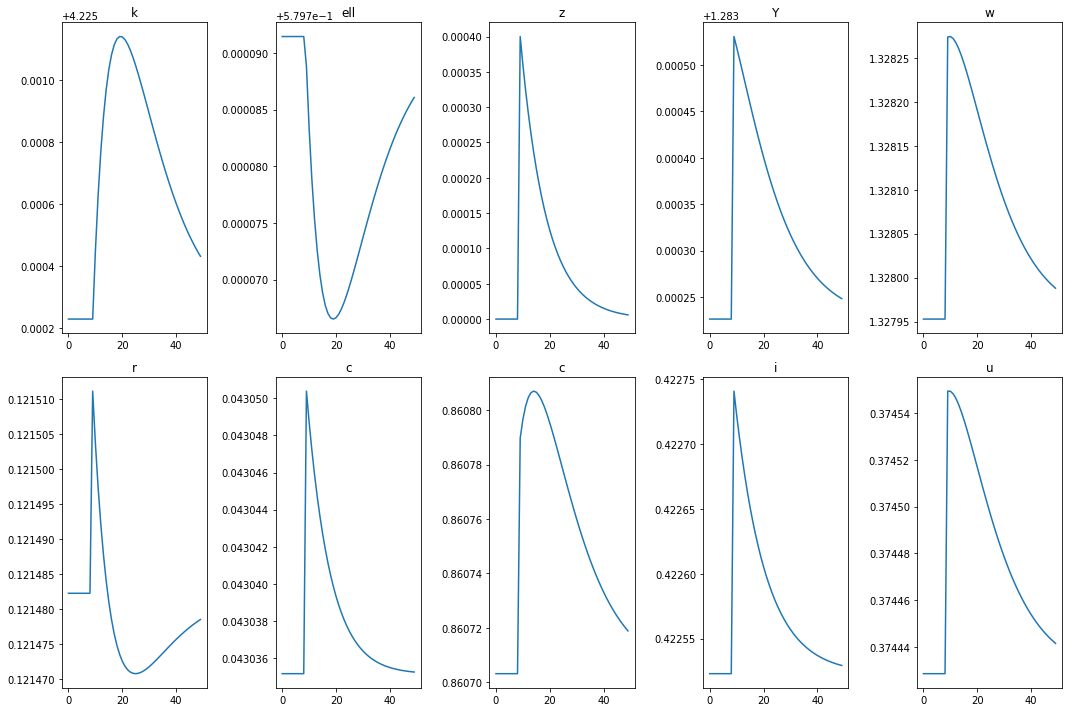

In [114]:
# set number of observations
nobs = 50 

# create a history of z's using equation (7)
zhist = np.zeros(nobs+1)
#epshist = sigma*np.random.normal(0., 1., nobs+1)
epshist = np.zeros(nobs+1)
# shock in period 10 with one st.dev. 
epshist[9] = sigma
zhist[0] = epshist[0]
for t in range(1,nobs+1):
    zhist[t] = rho*zhist[t-1] + epshist[t]
    
# LinApp_SSL requires that Zhist be a 2-dimensional array
Zhist = np.reshape(zhist, (nobs+1, 1))

# Linapp_SSL also requires that starting values be arrays
k0 = np.array([[kbar]])
ell0 = np.array([[ellbar]])

# create a history of k's and ell's using LinApp_SSL
khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

# create histories of remaining variables
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
Thist = np.zeros(nobs)
chist = np.zeros(nobs)
ihist = np.zeros(nobs)
uhist = np.zeros(nobs)
for t in range(0,nobs):
    Yhist[t], whist[t], rhist[t], Thist[t], chist[t], ihist[t], uhist[t] = \
        Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)
        
# delete last observation
khist = khist[0:nobs]
zhist = zhist[0:nobs]
ellhist = ellhist[0:nobs]

# plot time series
time = range(0, nobs)

fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 5,1)
plt.plot(time, khist, label='k')
plt.title('k')
plt.subplot(2, 5,2)
plt.plot(time, ellhist, label='l')
plt.title('ell')
plt.subplot(2, 5,3)
plt.plot(time, zhist, label='z')
plt.title('z')
plt.subplot(2, 5,4)
plt.plot(time, Yhist, label='Y')
plt.title('Y')
plt.subplot(2, 5,5)
plt.plot(time, whist, label='w')
plt.title('w')
plt.subplot(2, 5,6)
plt.plot(time, rhist, label='r')
plt.title('r')
plt.subplot(2, 5,7)
plt.plot(time, Thist, label='T')
plt.title('c')
plt.subplot(2, 5,8)
plt.plot(time, chist, label='c')
plt.title('c')
plt.subplot(2, 5,9)
plt.plot(time, ihist, label='i')
plt.title('i')
plt.subplot(2, 5,10)
plt.plot(time, uhist, label='u')
plt.title('u')

fig.tight_layout()

plt.show()